In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sample=pd.DataFrame([[150],[160],[170],[180],[185],[140],[130],[120],[190],[300]],
                    columns=['Height'])
sample

,Height
0,150
1,160
2,170
3,180
4,185
5,140
6,130
7,120
8,190
9,300


In [79]:
sample.reset_index(level=0, inplace=True)
sample

,index,Height
0,0,150
1,1,160
2,2,170
3,3,180
4,4,185
5,5,140
6,6,130
7,7,120
8,8,190
9,9,300


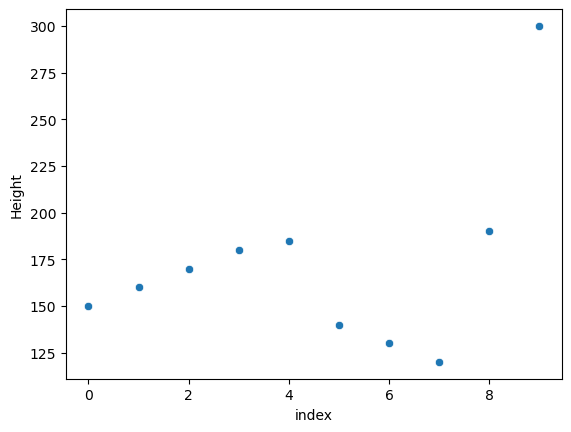

In [80]:
sns.scatterplot(x='index',y='Height',data=sample)
plt.show()

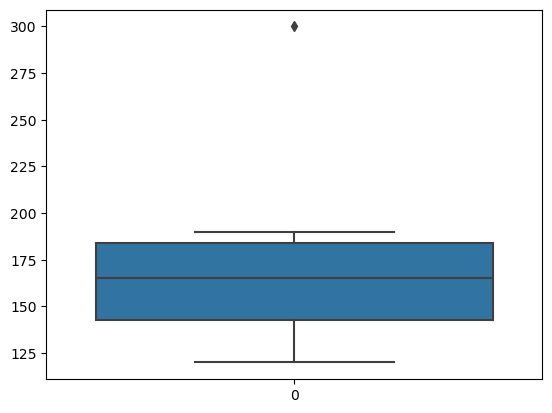

In [81]:
sns.boxplot(sample['Height'])
plt.show()

In [82]:
#to detect outliers present in any numerical column
def outlier_detection(data_col):
    sorted(data_col)
    Q1,Q3 = np.percentile(data_col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range    

In [83]:
lower_permissible_limit,upper_permissible_limit = outlier_detection(sample["Height"])    

In [84]:
print("Lower limit value: ", lower_permissible_limit)
print("Upper limit value: ", upper_permissible_limit)


Lower limit value:  80.625
Upper limit value:  245.625


In [85]:
sample[(sample.Height < lower_permissible_limit)|(sample.Height >upper_permissible_limit)]

,index,Height
9,9,300


In [86]:
#removing outlier from the dataset:
sample.drop(sample[(sample.Height<lower_permissible_limit)|(sample.Height>upper_permissible_limit)].index,
            inplace=True)        

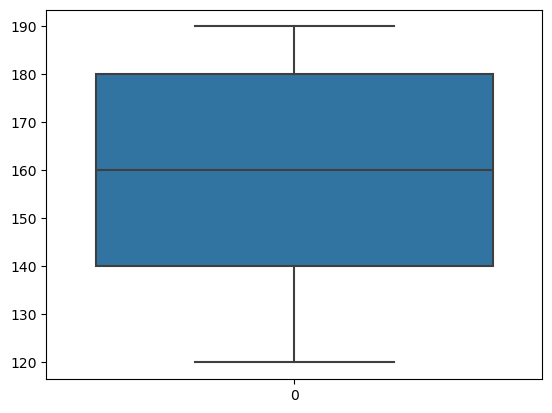

In [87]:
sns.boxplot(sample['Height'])
plt.show()